In [1]:
import pandas as pd 
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#population data 
unrwaPop = pd.read_csv("unrwa_totalpop.csv")
unrwaPop

#demo data 2019 onward 
unrwaDemo = pd.read_csv("unrwaDEMO_CleanLong.csv")
unrwaDemo


,Unnamed: 0,year,origin,asylum,population_type,population,gender,age
0,1,2019,Palestinian,State of Palestine,female_0-4,115683,female,0-4
1,2,2019,Palestinian,State of Palestine,female_5-11,139189,female,5-11
2,3,2019,Palestinian,State of Palestine,female_12-17,145473,female,12-17
3,4,2019,Palestinian,State of Palestine,female_18-59,620567,female,18-59
4,5,2019,Palestinian,State of Palestine,female_60,124911,female,60
...,...,...,...,...,...,...,...,...
295,296,2023,Palestinian,Syrian Arab Rep.,male_60,39308,male,60
296,297,2023,Palestinian,Syrian Arab Rep.,male_total,292666,male,total
297,298,2023,Palestinian,Syrian Arab Rep.,total,586578,total,NaN
298,299,2023,Palestinian,Syrian Arab Rep.,f_minor_all,83262,f,minor_all


In [19]:
#df showing total number of refugees under unrwa 
unrwaYearSum = unrwaPop[['Year', 'Total']].groupby('Year').sum().reset_index()
unrwaYearSum

#pseYearSum = pseAll[['population', 'year', 'population_group']].groupby(['year', 'population_group'])['population'].sum().to_frame().reset_index()

,Year,Total
0,1952,867458
1,1953,874596
2,1954,895249
3,1955,912425
4,1956,924922
...,...,...
68,2020,5703521
69,2021,5792907
70,2022,5887353
71,2023,5968636


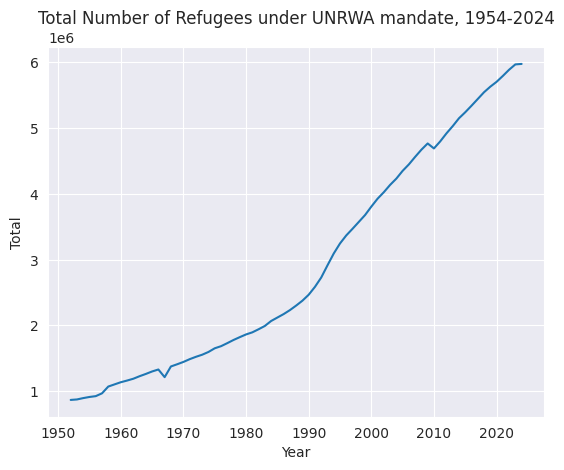

In [21]:
#creating a graph to show overall trend of UNRWA refugees 
unrwaYear_line = sns.lineplot(data = unrwaYearSum,
                            x = 'Year', y = 'Total',
                            markers='o')
sns.set_style('darkgrid')
plt.title('Total Number of Refugees under UNRWA mandate, 1954-2024')
plt.show()

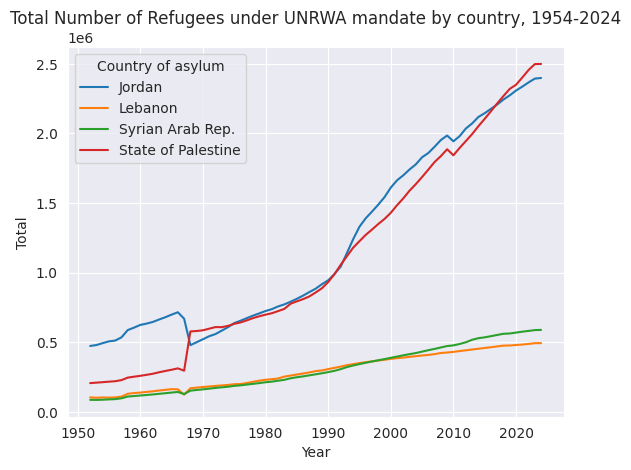

In [22]:
#graphing by country 
unrwaAll_line = sns.lineplot(data = unrwaPop,
                            x = 'Year', y = 'Total', hue = 'Country of asylum',
                            markers='o')
sns.set_style('darkgrid')
plt.title('Total Number of Refugees under UNRWA mandate by country, 1954-2024')
plt.show()

In [42]:
#looking at demographics 

#pulling only demographic info from 2023 
unrwa2023 = unrwaDemo[(unrwaDemo['year'] == 2023) & (~unrwaDemo['population_type'].str.contains('all|total'))]
unrwa2023

#converting male to neg
# convert male counts to negative
unrwa2023.loc[unrwa2023.gender.eq('male'), 'population'] = unrwa2023.population.mul(-1)
unrwa2023


,Unnamed: 0,year,origin,asylum,population_type,population,gender,age
240,241,2023,Palestinian,State of Palestine,female_0-4,104632,female,0-4
241,242,2023,Palestinian,State of Palestine,female_5-11,178447,female,5-11
242,243,2023,Palestinian,State of Palestine,female_12-17,152950,female,12-17
243,244,2023,Palestinian,State of Palestine,female_18-59,648792,female,18-59
244,245,2023,Palestinian,State of Palestine,female_60,148503,female,60
246,247,2023,Palestinian,State of Palestine,male_0-4,-111357,male,0-4
247,248,2023,Palestinian,State of Palestine,male_5-11,-188384,male,5-11
248,249,2023,Palestinian,State of Palestine,male_12-17,-159770,male,12-17
249,250,2023,Palestinian,State of Palestine,male_18-59,-672616,male,18-59
250,251,2023,Palestinian,State of Palestine,male_60,-131243,male,60


/tmp/ipykernel_2168/593972907.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=unrwa2023, x='population', y='age', hue='gender', orient='horizontal', dodge=False, ci = None, palette="Set2")


<Axes: xlabel='population', ylabel='age'>

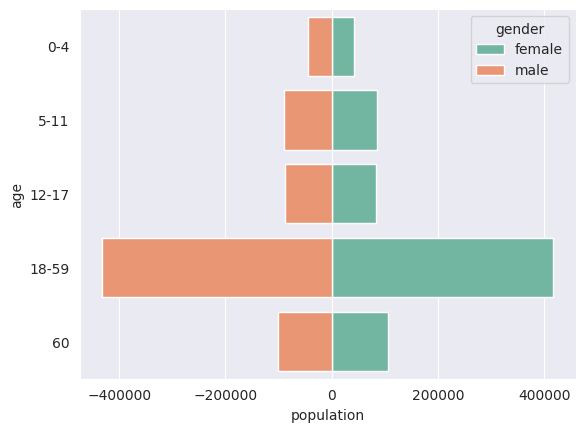

In [ ]:
# population pyramid
sns.barplot(data=unrwa2023, x='population', y='age', hue='gender', orient='horizontal', dodge=False, ci = None, palette="Set2")

#https://stackoverflow.com/questions/63619776/population-pyramid-with-python-and-seaborn
